In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo=pd.read_csv(r'C:\Users\aksha\Downloads\zoo1.csv')
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [4]:
zoo['animal_name']=zoo['animal_name'].astype('category')

In [5]:
zoo.dtypes

animal_name    category
hair              int64
feathers          int64
eggs              int64
milk              int64
airborne          int64
aquatic           int64
predator          int64
toothed           int64
backbone          int64
breathes          int64
venomous          int64
fins              int64
legs              int64
tail              int64
domestic          int64
catsize           int64
class_type        int64
dtype: object

In [6]:
zoo['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [7]:
zoo1=pd.get_dummies(zoo,columns=['legs'])
zoo1

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,class_type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,1,0,0,0,0
97,wasp,1,0,1,0,1,0,0,0,0,...,0,0,0,6,0,0,0,0,1,0
98,wolf,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,7,1,0,0,0,0,0


In [8]:
new=zoo1.drop('animal_name',axis=1)

In [9]:
new

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,class_type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,7,1,0,0,0,0,0


In [10]:
features=new.drop('class_type',axis=1)

In [11]:
features.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
tail        0
domestic    0
catsize     0
legs_0      0
legs_2      0
legs_4      0
legs_5      0
legs_6      0
legs_8      0
dtype: int64

In [12]:
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [13]:
corr=features.corr()
corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,...,-0.280313,0.048973,0.207208,0.455020,-0.419811,-0.203381,0.612649,-0.086103,-0.017259,-0.122382
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,...,-0.223541,0.292569,0.031586,-0.135934,-0.269829,0.822634,-0.385917,-0.049690,-0.164722,-0.070627
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,...,0.164796,-0.221090,-0.155610,-0.514650,0.266547,0.191902,-0.588757,0.084372,0.279691,-0.024270
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,...,-0.156328,0.210026,0.163928,0.574906,-0.304650,-0.180424,0.648185,-0.082664,-0.274028,-0.117493
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,...,-0.251157,0.009482,0.063274,-0.349768,-0.303163,0.608888,-0.433593,-0.055829,0.282234,-0.079352
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,...,0.604492,-0.034642,-0.224308,-0.111866,0.483188,-0.122558,-0.279275,0.134371,-0.108275,0.042605
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,...,0.190302,0.018947,-0.309794,0.144790,0.201765,-0.178709,0.038271,0.089642,-0.169712,0.127412
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,...,0.364292,0.310368,0.069430,0.344010,0.246629,-0.425731,0.503540,-0.123491,-0.409368,-0.175522
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,...,0.209499,0.731762,0.101733,0.356976,0.006108,0.281296,0.308270,-0.214735,-0.711840,-0.305211
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,...,-0.617219,0.088952,0.124068,0.204125,-0.652626,0.309479,0.347549,-0.195180,0.006470,-0.102297


<Axes: >

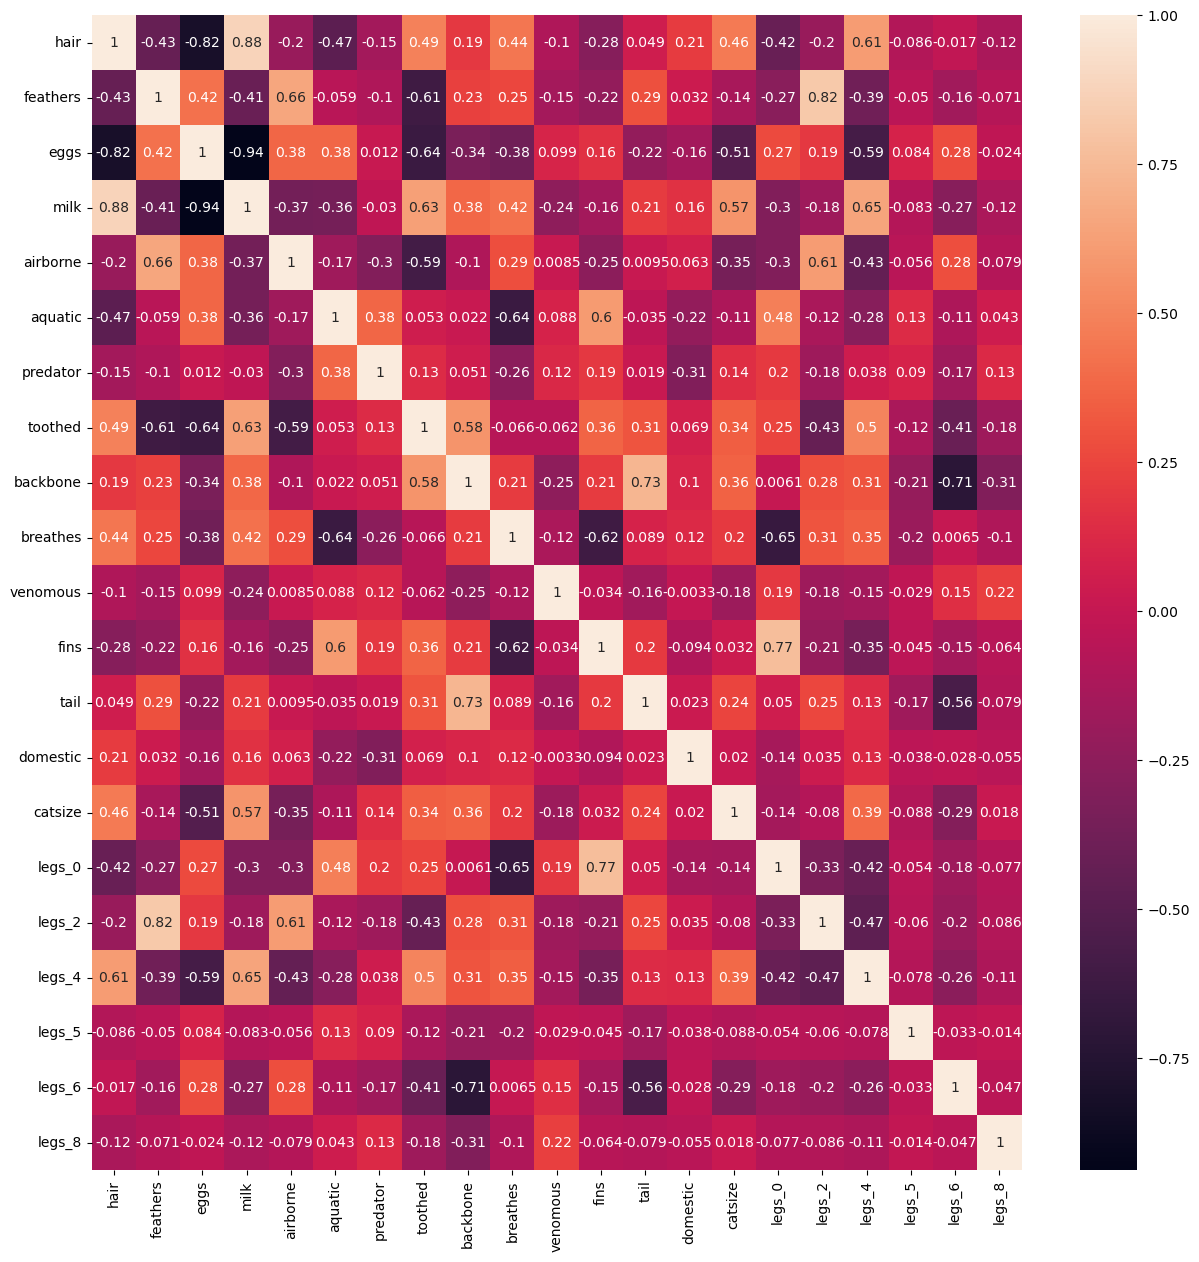

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

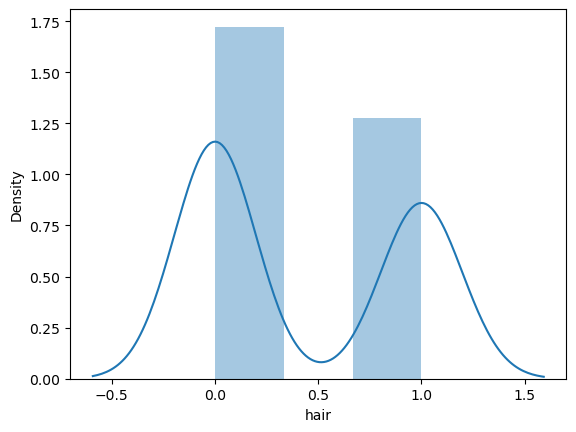

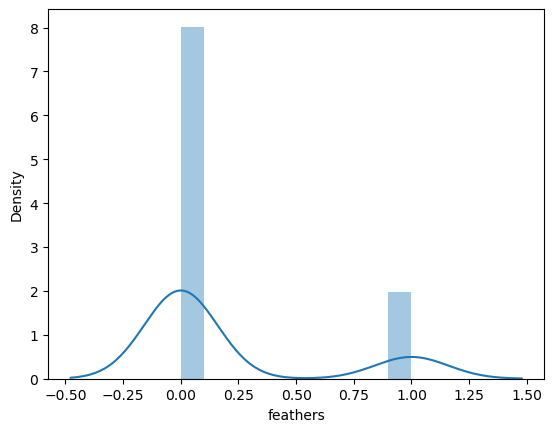

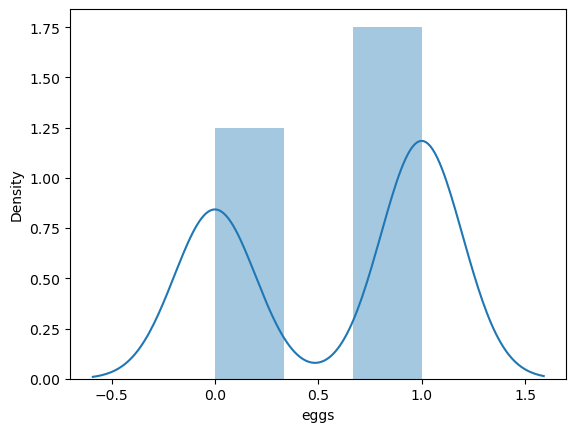

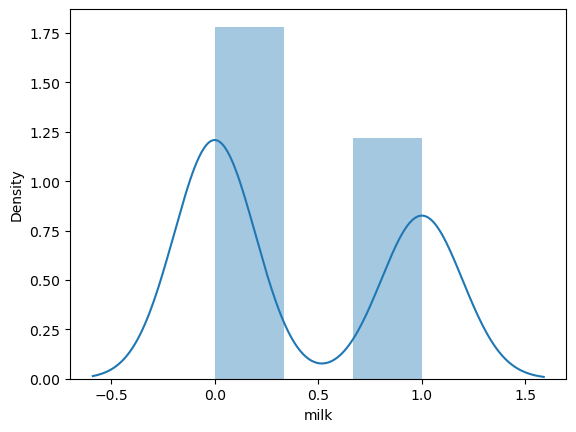

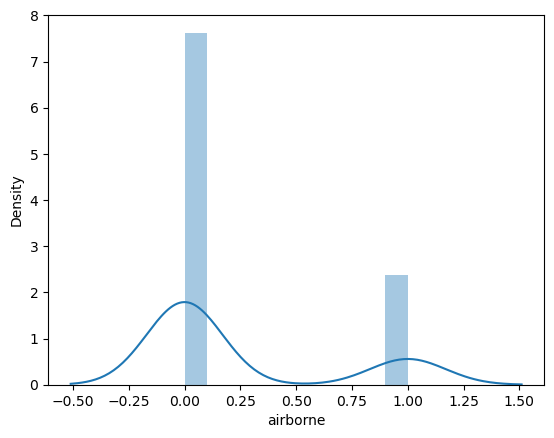

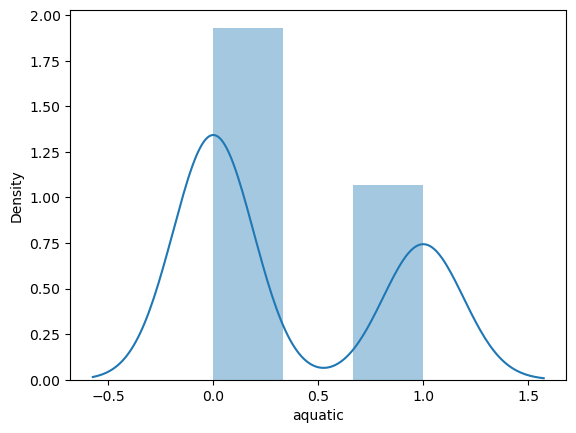

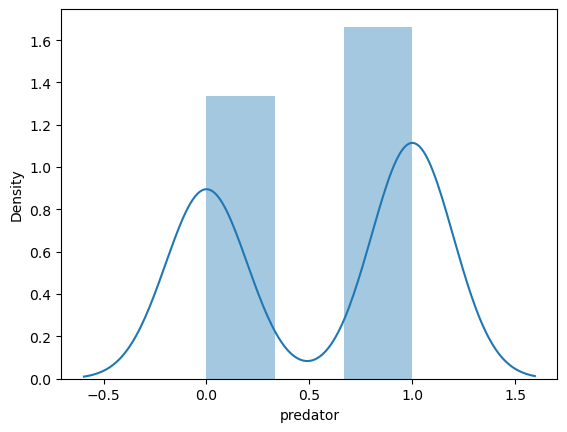

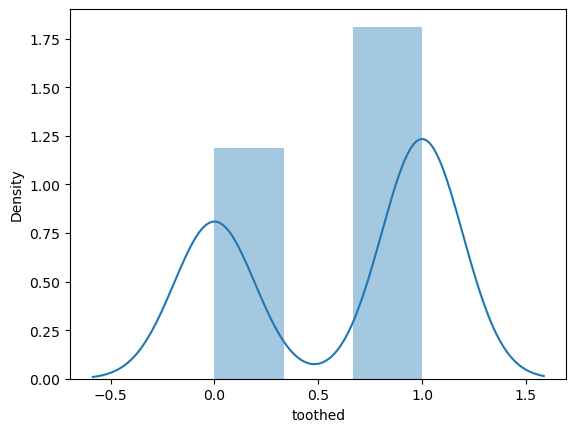

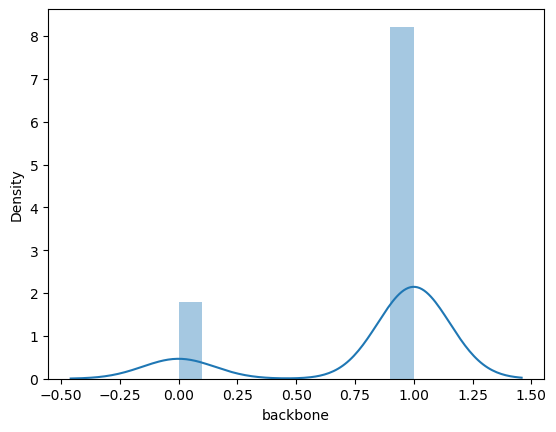

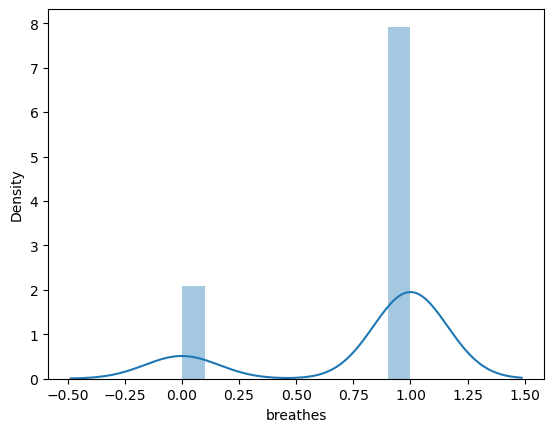

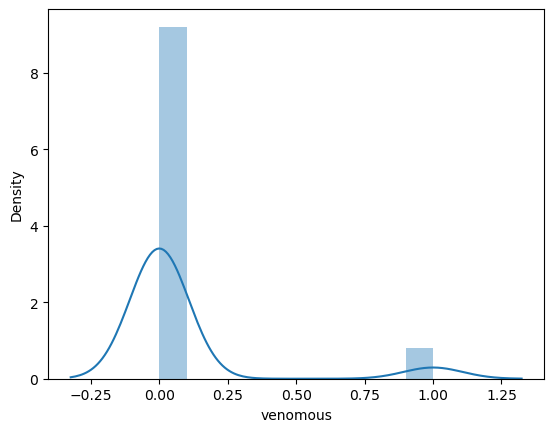

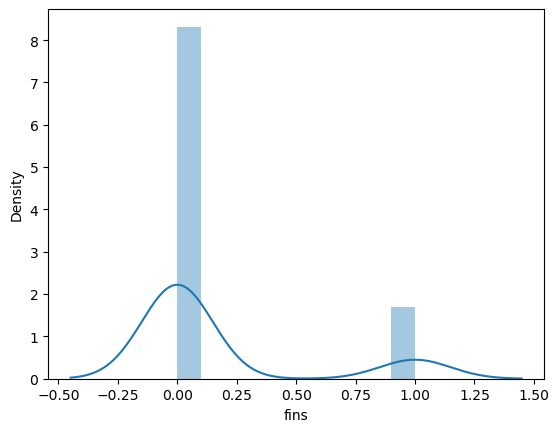

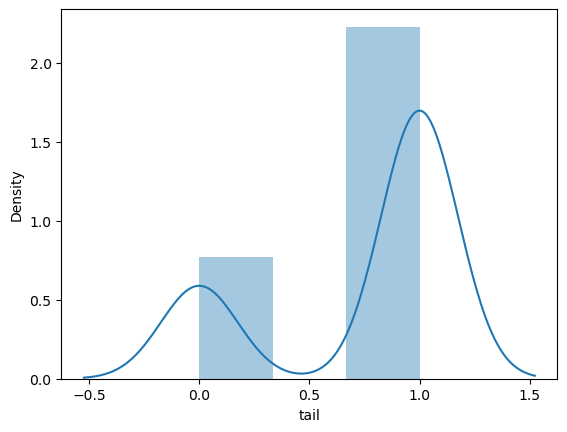

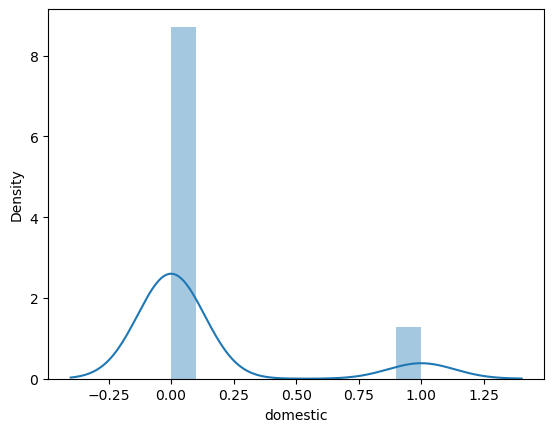

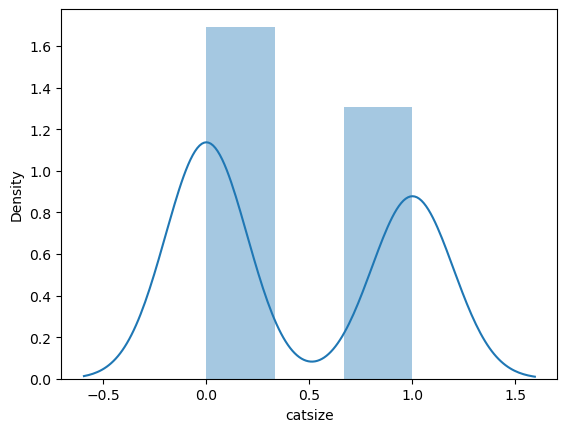

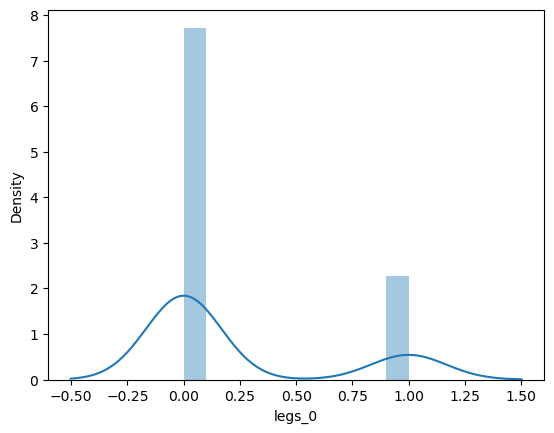

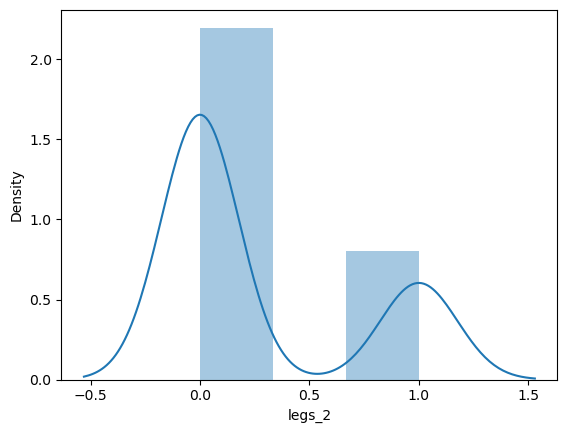

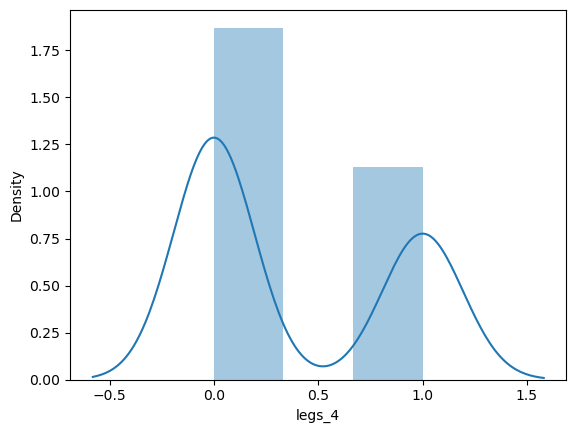

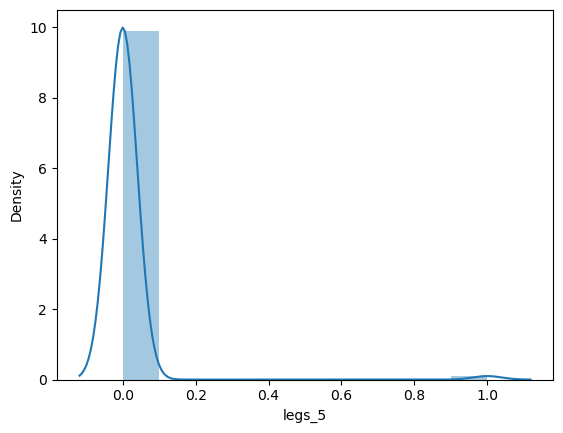

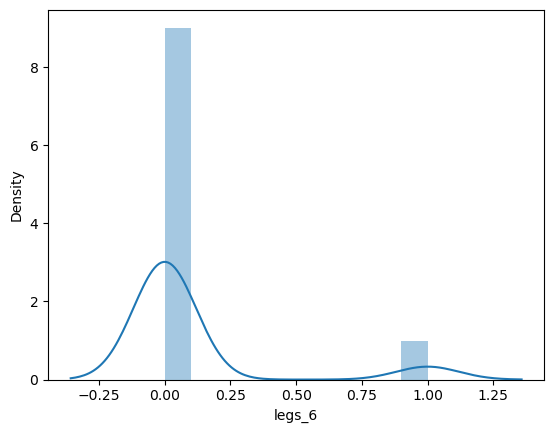

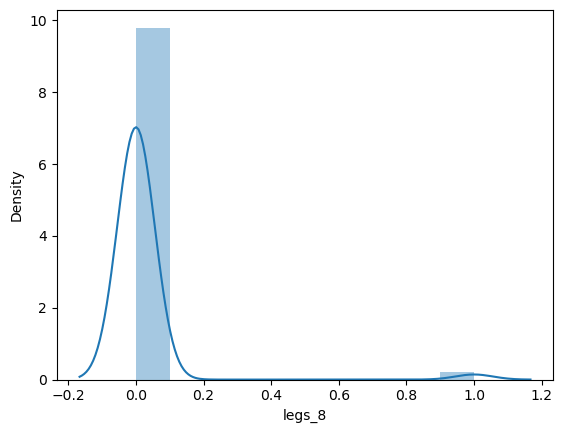

In [23]:
for i in features:
    sns.distplot(features[i])
    plt.show()

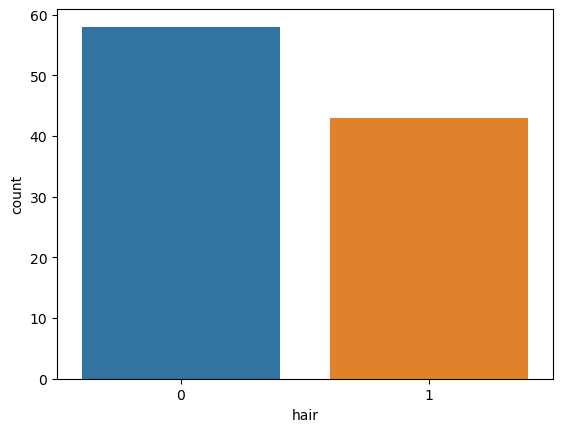

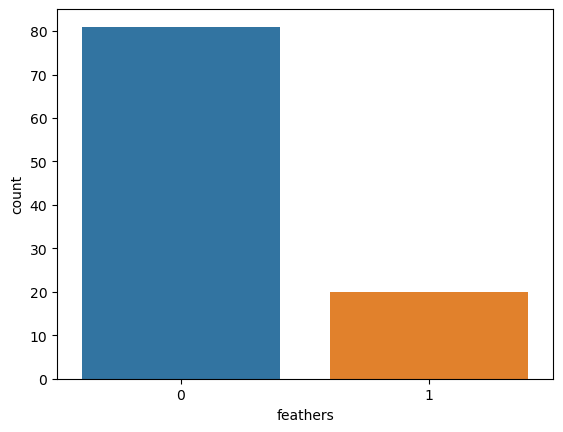

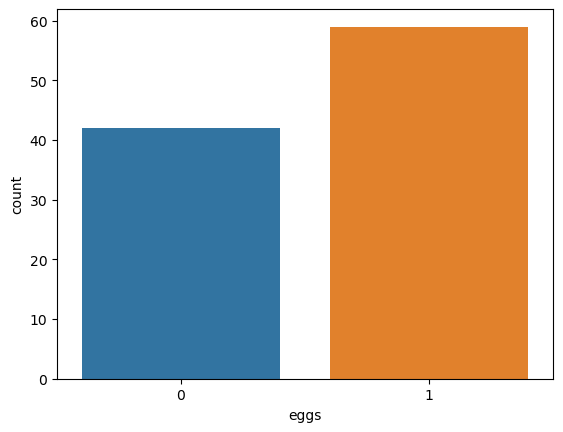

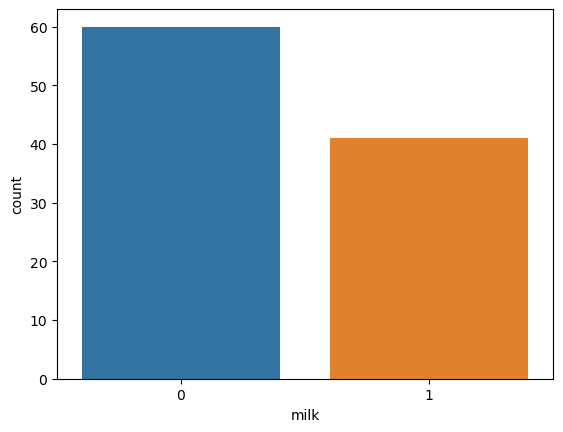

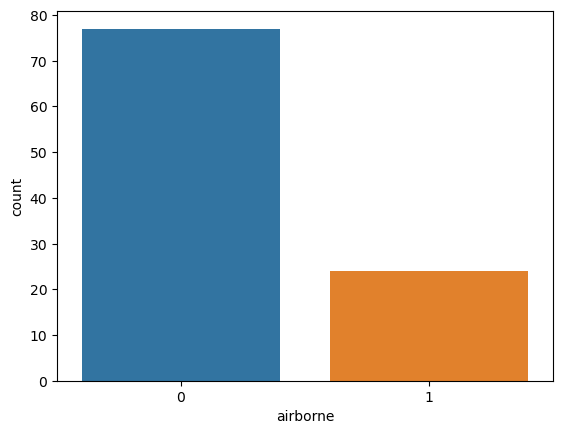

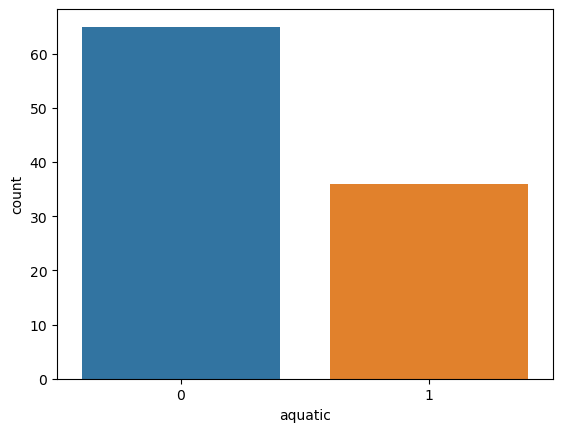

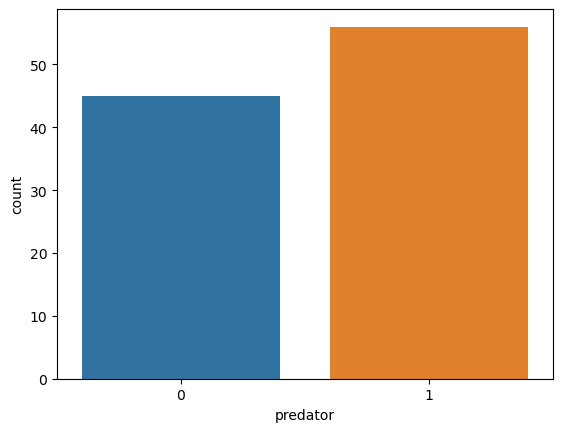

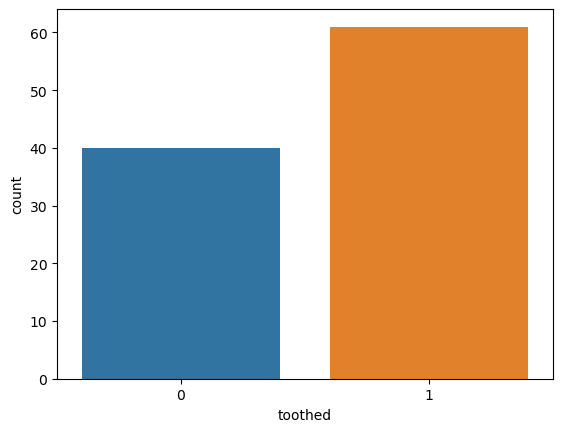

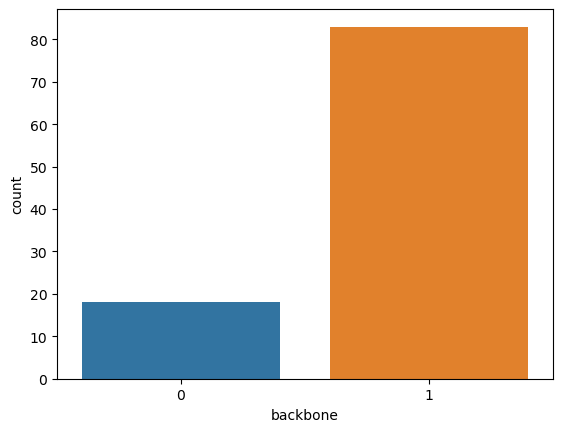

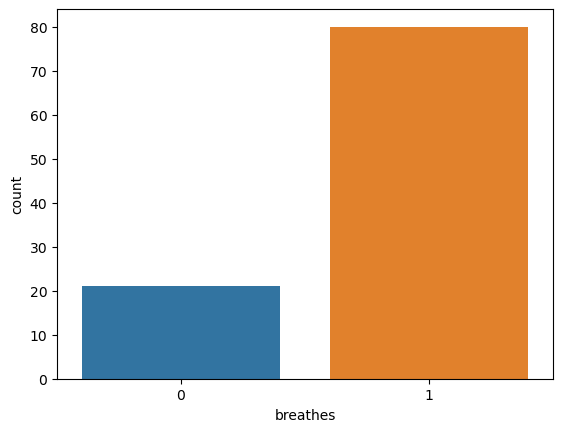

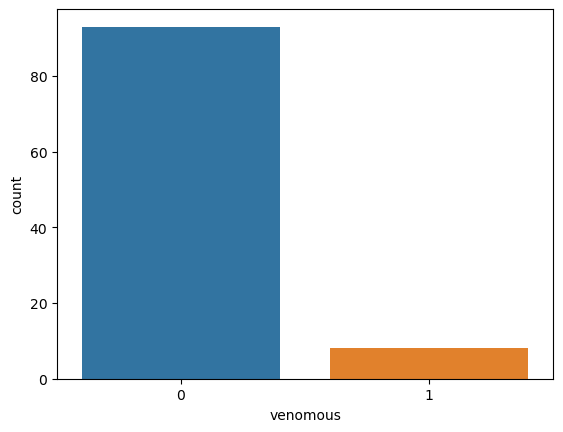

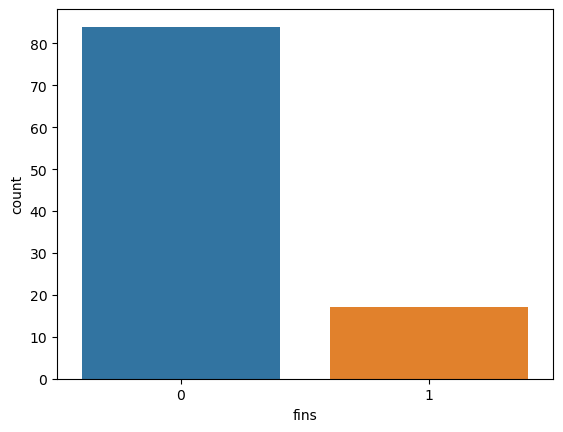

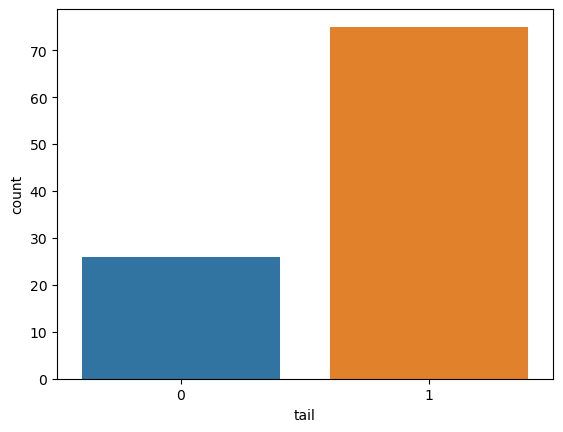

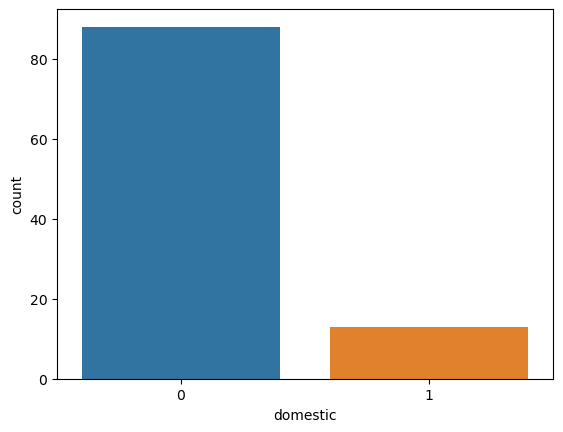

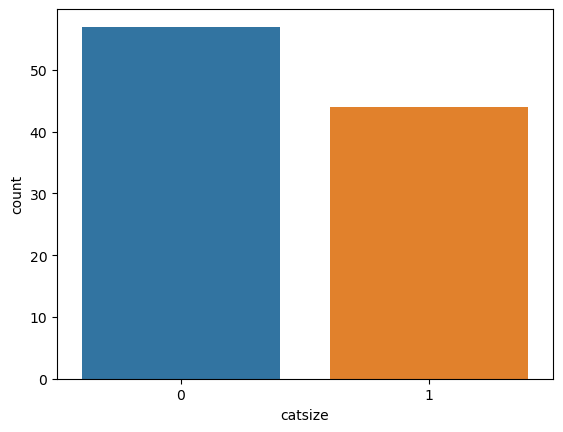

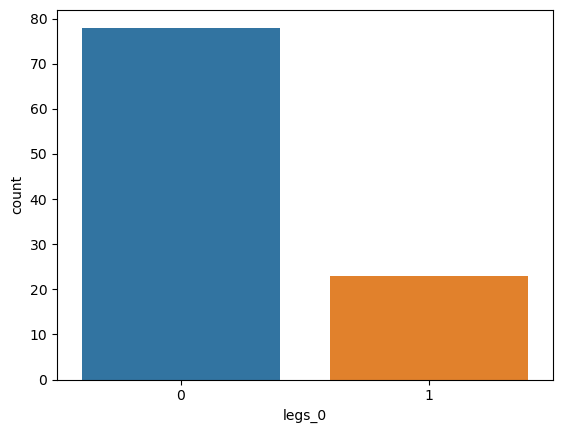

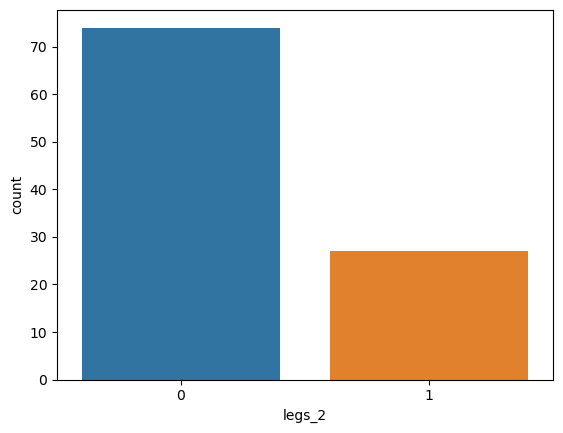

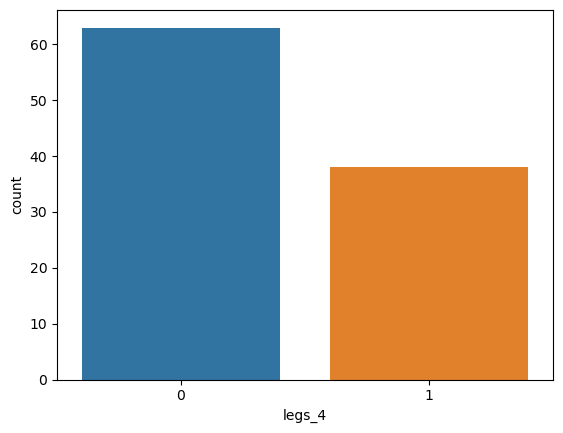

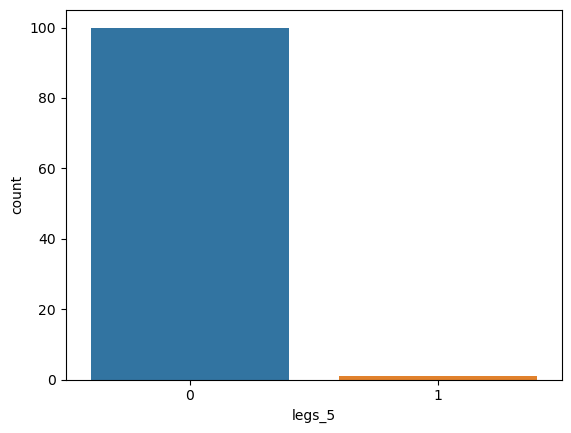

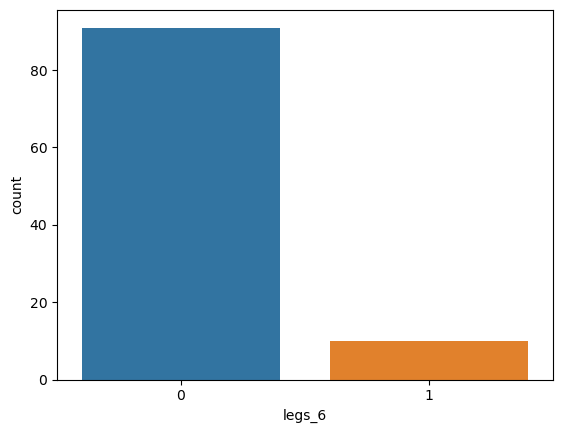

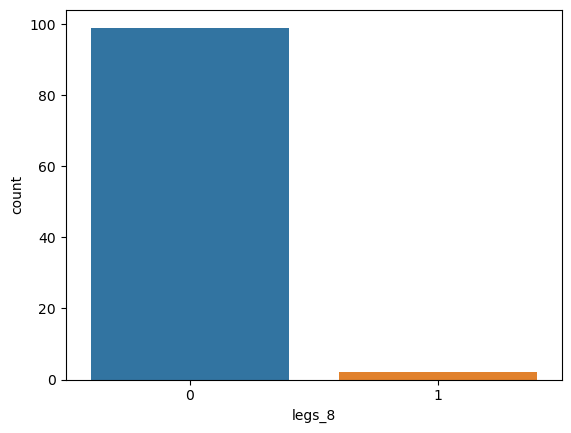

In [25]:
for i in features:
    sns.countplot(x=i,data=features)
    plt.show()

In [15]:
target=new[['class_type']]
target

,class_type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


<Axes: xlabel='class_type', ylabel='count'>

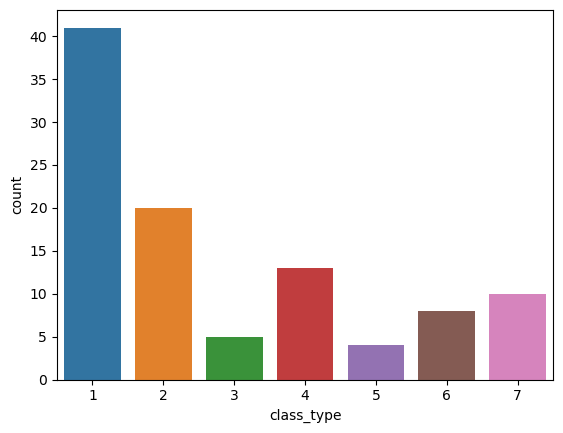

In [16]:
sns.countplot(x='class_type',data=target)

<Axes: >

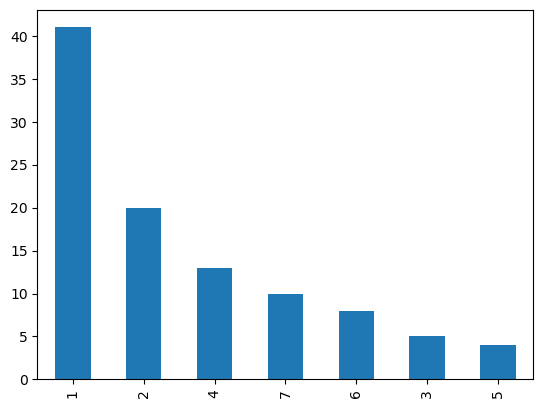

In [17]:
zoo['class_type'].value_counts().plot(kind='bar')

In [18]:
knn=KNeighborsClassifier(n_neighbors=4)

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.75,random_state=100)

In [20]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(75, 21) (26, 21) (75, 1) (26, 1)


In [21]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [22]:
ypredt=knn.predict(xtest)

In [23]:
ypredt

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 3, 6, 1, 4, 1, 2, 2, 1, 1,
       2, 2, 1, 1], dtype=int64)

In [24]:
accuracy_score(ytest,ypredt)

1.0

In [25]:
knn.score(xtrain,ytrain)

0.96

In [26]:
ypredt

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 3, 6, 1, 4, 1, 2, 2, 1, 1,
       2, 2, 1, 1], dtype=int64)

In [27]:
ytest

,class_type
37,2
86,4
26,5
93,1
35,1
25,5
36,1
33,2
78,2
21,2


In [28]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_search=GridSearchCV(knn,params)

In [31]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [32]:
grid_search.best_params_

{'n_neighbors': 1}

In [46]:
kvalues=np.arange(1,10)
test_acc=[]
train_acc=[]
for i,k in enumerate(kvalues):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    test_acc.append(knn.score(xtest,ytest))
    train_acc.append(knn.score(xtrain,ytrain))
    

In [50]:
test_acc

[0.9615384615384616,
 1.0,
 0.9615384615384616,
 1.0,
 1.0,
 0.9230769230769231,
 0.9230769230769231,
 0.8846153846153846,
 0.8846153846153846]

In [51]:
train_acc

[1.0,
 0.9733333333333334,
 0.9733333333333334,
 0.96,
 0.9466666666666667,
 0.92,
 0.9066666666666666,
 0.8666666666666667,
 0.8666666666666667]

Text(0, 0.5, 'Accuracy')

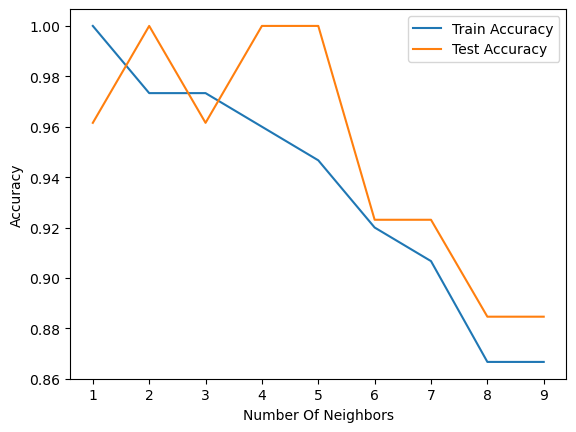

In [49]:
plt.plot(kvalues,train_acc,label='Train Accuracy')
plt.plot(kvalues,test_acc,label='Test Accuracy')
plt.legend()
plt.xlabel('Number Of Neighbors')
plt.xticks(kvalues)
plt.ylabel('Accuracy')